In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(isTest = False, randomize = False):
    images = []
    labels = []
    default = "../chest_Xray/"
    if isTest:
        default = default + "test/"
    else:
        default = default + "train/"

    for typee in ["NORMAL", "PNEUMONIA"]:
        pathType = default + typee + "/"
        for file in os.listdir(pathType):
            completePath = pathType + file
            img = cv2.imread(completePath, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (400,400))
            imgArr = np.array(img)
            pixels = img.flatten()
            images.append(pixels)
            if typee == "PNEUMONIA":
                if 'virus' in file:
                    labels.append(1)
                else:
                    labels.append(2)
            else:
                labels.append(0)

    images = np.array(images)
    labels = np.array(labels)
    if randomize:      
        indices = np.random.permutation(images.shape[0])
        images = images[indices]
        labels = labels[indices]
    return (images, labels)


        
    

In [3]:
images_train_rand, labels_train_rand = load_data(randomize= True)
images_train_ord, labels_train_ord = load_data()
images_test, labels_test = load_data(True)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

class knn:
    def __init__(self, neighbors, train):
        self.knn = KNeighborsClassifier(n_neighbors = neighbors)
        self.knn.fit(train[0], train[1])

    def score(self, test):
        return self.knn.score(test[0], test[1])
        


In [9]:
score_ord = []
for i in range(20):
    if i == 0:
        continue
    tmpScore = knn(i, (images_train_ord, labels_train_ord)).score((images_test, labels_test))
    score_ord.append(tmpScore)
print(score_ord)

[0.5993589743589743, 0.6330128205128205, 0.6522435897435898, 0.6538461538461539, 0.657051282051282, 0.655448717948718, 0.6490384615384616, 0.6426282051282052, 0.6538461538461539, 0.6474358974358975, 0.6634615384615384, 0.6602564102564102, 0.6682692307692307, 0.6714743589743589, 0.6698717948717948, 0.6666666666666666, 0.6634615384615384, 0.6698717948717948, 0.657051282051282]


In [6]:
score = []
for i in range(20):
    if i == 0:
        continue
    tmpScore = knn(i, (images_train_rand, labels_train_rand)).score((images_test, labels_test))
    score.append(tmpScore)
print(score)

[0.5993589743589743, 0.6330128205128205, 0.6522435897435898, 0.6538461538461539, 0.657051282051282, 0.655448717948718, 0.6490384615384616, 0.6426282051282052, 0.6538461538461539, 0.6474358974358975, 0.6634615384615384, 0.6602564102564102, 0.6682692307692307, 0.6714743589743589, 0.6698717948717948, 0.6666666666666666, 0.6634615384615384, 0.6698717948717948, 0.657051282051282]


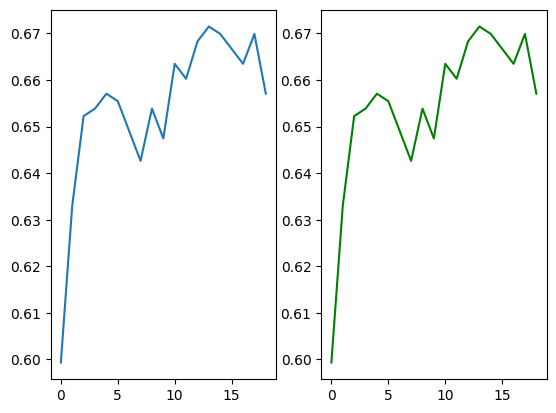

In [13]:
fig, ax = plt.subplots(ncols = 2)

ax[0].plot(score)
ax[1].plot(score_ord, color="green")
plt.show()